In [57]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
import os
from distutils.dir_util import copy_tree, remove_tree
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.7.0


In [2]:
base_dir = "/Users/miguelmonares/PycharmProjects/fashionTest/alzwoo/"
root_dir = "./"
test_dir = base_dir + "test/"
train_dir = base_dir + "train/"
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
    remove_tree(work_dir)

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['.DS_Store', 'VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented']


In [19]:
WORK_DIR = './dataset/'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

IMG_SIZE = 50
IMAGE_SIZE = [50, 50]
DIM = (IMG_SIZE, IMG_SIZE)

work_dr = IDG(rescale = 1./255)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=6500, shuffle=False)

Found 6400 images belonging to 4 classes.


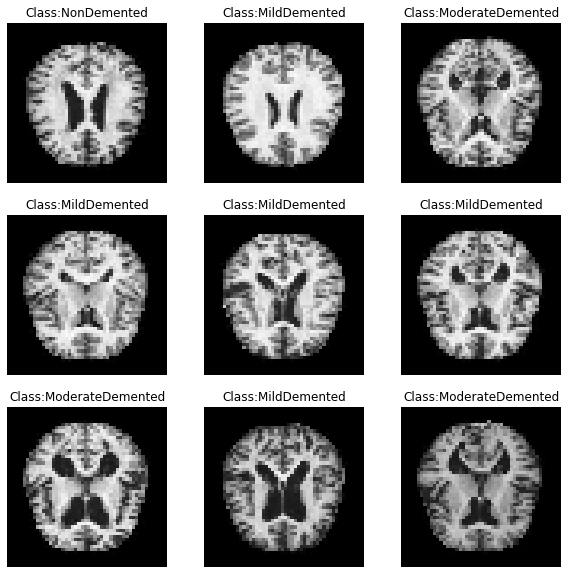

In [20]:

def show_images(generator,y_pred=None):
    """
    Input: An image generator,predicted labels (optional)
    Output: Displays a grid of 9 images with lables
    """

    # get image lables
    labels =dict(zip([0,1,2,3], CLASSES))

    # get a batch of images
    x,y = generator.next()

    # display a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, 6400)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))

    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))

show_images(train_data_gen)

In [21]:
train_data, train_labels = train_data_gen.next()

In [22]:
sm = SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)
train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(train_data.shape, train_labels.shape)

(12800, 50, 50, 3) (12800, 4)


In [23]:
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)


In [51]:

def construct_model(act='relu'):
    model = Sequential([
        Input(shape=(*IMAGE_SIZE, 3)),
        Conv2D(16, 3, activation=act, padding='same'),
        Conv2D(16, 3, activation=act, padding='same'),
        MaxPool2D(),
        Dropout(.2),

        Flatten(),

        Dense(4, activation='softmax')
    ], name = "cnn_model")

    return model

In [52]:
model = construct_model()

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]

model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 50, 50, 16)        448       
                                                                 
 conv2d_31 (Conv2D)          (None, 50, 50, 16)        2320      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 25, 25, 16)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 25, 25, 16)        0         
                                                                 
 flatten_10 (Flatten)        (None, 10000)             0         
                                                                 
 dense_12 (Dense)            (None, 4)                 40004     
                                                         

In [53]:

EPOCHS = 5

history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels),  epochs=EPOCHS)

Epoch 1/5
256/256 [==============================] - 10s 38ms/step - loss: 0.8673 - acc: 0.6262 - auc: 0.8677 - val_loss: 0.5394 - val_acc: 0.7754 - val_auc: 0.9500

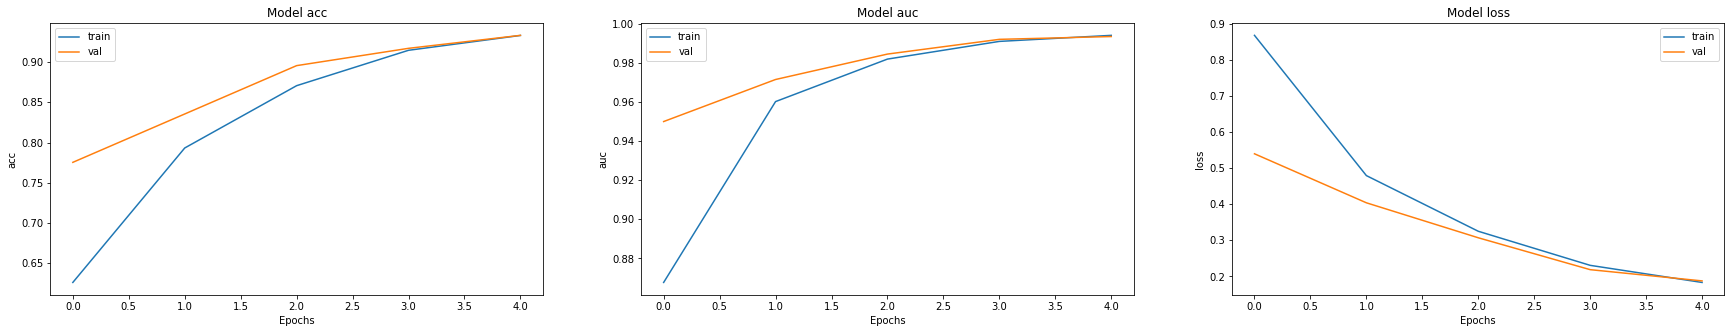

In [54]:
fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [55]:
test_scores = model.evaluate(test_data, test_labels)

80/80 [==============================] - 1s 6ms/step - loss: 0.1981 - acc: 0.9262 - auc: 0.9931

In [61]:
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

print(test_scores)#%%

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
import os
from distutils.dir_util import copy_tree, remove_tree
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D
print("TensorFlow Version:", tf.__version__)

Testing Accuracy: 92.62%
[0.19810029864311218, 0.9261718988418579, 0.993058979511261]


In [ ]:
base_dir = "/Users/miguelmonares/PycharmProjects/fashionTest/alzwoo/"
root_dir = "./"
test_dir = base_dir + "test/"
train_dir = base_dir + "train/"
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
    remove_tree(work_dir)

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

In [ ]:
WORK_DIR = './dataset/'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

IMG_SIZE = 50
IMAGE_SIZE = [50, 50]
DIM = (IMG_SIZE, IMG_SIZE)

work_dr = IDG(rescale = 1./255)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=6500, shuffle=False)

In [ ]:

def show_images(generator,y_pred=None):
    """
    Input: An image generator,predicted labels (optional)
    Output: Displays a grid of 9 images with lables
    """

    # get image lables
    labels =dict(zip([0,1,2,3], CLASSES))

    # get a batch of images
    x,y = generator.next()

    # display a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, 6400)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))

    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))

show_images(train_data_gen)

In [ ]:
train_data, train_labels = train_data_gen.next()

In [ ]:
sm = SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)
train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(train_data.shape, train_labels.shape)

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [ ]:

def construct_model(act='relu'):
    model = Sequential([
        Input(shape=(*IMAGE_SIZE, 3)),
        Conv2D(16, 3, activation=act, padding='same'),
        Conv2D(16, 3, activation=act, padding='same'),
        MaxPool2D(),
        Dropout(.2),

        Flatten(),

        Dense(4, activation='softmax')
    ], name = "cnn_model")

    return model

In [ ]:
model = construct_model()

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]

model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

model.summary()

In [ ]:

EPOCHS = 5

history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels),  epochs=EPOCHS)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
test_scores = model.evaluate(test_data, test_labels)

In [62]:
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

print("Testing AUC: %.2f%%"%(test_scores[2] * 100))








Testing Accuracy: 92.62%
Testing AUC: 99.31%
